<a href="https://colab.research.google.com/github/ind-kum/M.L.-EVELUTION-PROJECTS/blob/master/Project_33_Doctor_consult_Fees_Prediction_Using_LGBM_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df_train = pd.read_excel("/content/drive/MyDrive/DATASETS/Doctor_consult_Train.xlsx")
df_train["source"]="train"
df_test = pd.read_excel("/content/drive/MyDrive/DATASETS/Doctor_consult_Test.xlsx")
df_test["source"]="test"
df_doc=pd.concat([df_train,df_test])
df_doc

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,source,Unnamed: 1
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,train,NaN
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,train,NaN
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,train,NaN
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,train,NaN
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%,train,NaN
...,...,...,...,...,...,...,...,...,...
1982,10 years experience,NaN,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",NaN,test,NaN
1983,4 years experience,NaN,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN,test,NaN
1984,9 years experience,NaN,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN,test,NaN
1985,12 years experience,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,"Arekere, Bangalore",Dentist,BDS,98%,test,NaN


In [3]:
#lets reset the index
df_doc.reset_index(drop=True,inplace=True)
df_doc

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,source,Unnamed: 1
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,train,NaN
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,train,NaN
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,train,NaN
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,train,NaN
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%,train,NaN
...,...,...,...,...,...,...,...,...,...
7943,10 years experience,NaN,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",NaN,test,NaN
7944,4 years experience,NaN,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN,test,NaN
7945,9 years experience,NaN,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN,test,NaN
7946,12 years experience,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,"Arekere, Bangalore",Dentist,BDS,98%,test,NaN


In [4]:
#displaying the data
df_doc.drop(columns=["Unnamed: 1"],inplace=True)
df_doc

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,source
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,train
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,train
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,train
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,train
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%,train
...,...,...,...,...,...,...,...,...
7943,10 years experience,NaN,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",NaN,test
7944,4 years experience,NaN,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN,test
7945,9 years experience,NaN,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN,test
7946,12 years experience,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,"Arekere, Bangalore",Dentist,BDS,98%,test


In [5]:
#lets chcek the null values
df_doc.isnull().sum()

Experience               0
Fees                  1987
Miscellaneous_Info    3454
Place                   31
Profile                  0
Qualification            0
Rating                4392
source                   0
dtype: int64

In [6]:
#Lets chcek the value counts of object type columns
for col in df_doc.columns:
    if df_doc[col].dtype=="object":
        print(df_doc[col].value_counts())
        print()

9 years experience     419
10 years experience    404
8 years experience     380
11 years experience    374
12 years experience    358
                      ... 
61 years experience      1
64 years experience      1
58 years experience      1
66 years experience      1
60 years experience      1
Name: Experience, Length: 64, dtype: int64

Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth    50
Skin Allergy Treatment Skin Allergies Dermabrasion                    18
Tooth Extraction Dental Fillings Scaling / Polishing                  16
Dental Fillings Zirconia Crowns Dental Implant Fixing                 15
Dermabrasion Laser Resurfacing Acne / Pimples Treatment               14
                                                                      ..
Presurgical Orthodontics Dentofacial Orthopedics                       1
88% 24 Feedback Bhayandar West, Mumbai                                 1
96% 7 Feedback Kalapatti, Coimbatore                                   1
77

In [7]:
#Miscellaneous_Info is a special information unique to the doctor,so its impossible to impute it
#So we will drop replace null values as missing
#df_doc.drop(columns=["Miscellaneous_Info"],inplace=True)
df_doc["Miscellaneous_Info"].fillna("missing",inplace=True)

In [8]:
#We can convert experience column to datatype int
#At fisrt we need to strip of " years experience"
df_doc["Experience"]=df_doc["Experience"].str.strip(" years experience")

In [9]:
#lets see the Experice column
df_doc["Experience"]

0       24
1       12
2        9
3       12
4       20
        ..
7943    10
7944     4
7945     9
7946    12
7947     8
Name: Experience, Length: 7948, dtype: object

In [10]:
#Now we need to convert the Experience column to int
df_doc["Experience"]=df_doc["Experience"].astype(int)

In [11]:
#lets chcek the datatype of the columns in datasets
df_doc.dtypes

Experience              int64
Fees                  float64
Miscellaneous_Info     object
Place                  object
Profile                object
Qualification          object
Rating                 object
source                 object
dtype: object

In [12]:
#Rating grouped by profile
df_doc.groupby(["Profile"]).agg({"Rating":lambda x: x.value_counts().index[0]})

,Rating
Profile,
Ayurveda,100%
Dentist,100%
Dermatologists,100%
ENT Specialist,100%
General Medicine,100%
Homeopath,100%


In [13]:
#Lets strip the"%" of Rating
df_doc["Rating"]=df_doc["Rating"].str.strip("%")

In [14]:
#Converting Rating to float 
df_doc["Rating"]=df_doc["Rating"].astype(float)

In [15]:
df_doc["Rating"]

0       100.0
1        98.0
2         NaN
3         NaN
4       100.0
        ...  
7943      NaN
7944      NaN
7945      NaN
7946     98.0
7947      NaN
Name: Rating, Length: 7948, dtype: float64

In [16]:
#Lets chcek the rows where null values are there
df_doc.loc[df_doc["Rating"].isnull()]
#Here we see in most of "Rating" is nan where miscellaneous_info is missin

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,source
2,9,300.0,missing,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,train
3,12,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,train
5,8,100.0,missing,"Porur, Chennai",Ayurveda,BAMS,NaN,train
6,42,200.0,missing,"Karol Bagh, Delhi",Homeopath,BHMS,NaN,train
8,14,100.0,missing,"Old City, Hyderabad",General Medicine,"MBBS, MD - General Medicine",NaN,train
...,...,...,...,...,...,...,...,...
7942,8,NaN,missing,"Lajpat Nagar III, Delhi",Dermatologists,"MBBS, MD - Dermatology , Venereology & Leprosy...",NaN,test
7943,10,NaN,missing,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",NaN,test
7944,4,NaN,missing,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN,test
7945,9,NaN,missing,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN,test


In [17]:
#Lets replace the null values in rating with 0
df_doc["Rating"].fillna(0,inplace=True)

In [18]:
#chceking null values again
df_doc.isnull().sum()
#Fees what ever null count  is there is what needs to predicted and is part of test dataset
#So we are left with "Place" column which needs to be imputed

Experience               0
Fees                  1987
Miscellaneous_Info       0
Place                   31
Profile                  0
Qualification            0
Rating                   0
source                   0
dtype: int64

In [19]:
#Lets chcek the value counts
df_doc["Place"].value_counts()

Andheri West, Mumbai         97
HSR Layout, Bangalore        97
Dwarka, Delhi                93
Banjara Hills, Hyderabad     85
Mulund West, Mumbai          81
                             ..
Connaught Place, Delhi        1
Alipur, Delhi                 1
Dickenson Road, Bangalore     1
Kothamangalam, Ernakulam      1
Lingarajapuram, Bangalore     1
Name: Place, Length: 948, dtype: int64

In [20]:
#This will have 5 places where maximum number of doctors sit
top_doc_places=df_doc["Place"].value_counts().index[0:5]

In [21]:
null_condition=df_doc[["Place"]].isnull()
null_condition

,Place
0,False
1,False
2,False
3,False
4,False
...,...
7943,False
7944,False
7945,False
7946,False


In [22]:
#We  will impute the null values with fisrt top 5 popular places where doctor sit
null_condition=df_doc[["Place"]].isnull()
count=0
for index_null in null_condition.index:
    if null_condition.loc[index_null][0]==True:
        if count%5==0:
            df_doc.loc[index_null,["Place"]]=top_doc_places[0]
        if count%5==1:
            df_doc.loc[index_null,["Place"]]=top_doc_places[1]
        if count%5==2:
            df_doc.loc[index_null,["Place"]]=top_doc_places[2]
        if count%5==3:
            df_doc.loc[index_null,["Place"]]=top_doc_places[3]
        if count%5==4:
            df_doc.loc[index_null,["Place"]]=top_doc_places[4]
        count=count+1

In [23]:
#Lets again chcek null values
df_doc.isnull().sum()

Experience               0
Fees                  1987
Miscellaneous_Info       0
Place                    0
Profile                  0
Qualification            0
Rating                   0
source                   0
dtype: int64

In [24]:
#value counts for place
df_doc["Place"].value_counts()
#There fore we have evenly imputed the null values with top 5 places

Andheri West, Mumbai         104
HSR Layout, Bangalore        103
Dwarka, Delhi                 99
Banjara Hills, Hyderabad      91
Mulund West, Mumbai           87
                            ... 
Connaught Place, Delhi         1
Alipur, Delhi                  1
Dickenson Road, Bangalore      1
Kothamangalam, Ernakulam       1
Lingarajapuram, Bangalore      1
Name: Place, Length: 948, dtype: int64

In [25]:
#Now we will divide the Place column into multiple columns
#First we will find maximum Length 
max_address_length=-1
for i in range(len(df_doc["Place"])):
    temp=len(df_doc["Place"].iloc[i].strip().upper().split(","))
    if temp>max_address_length:
        max_address_length=temp
print("Max address length is :{}".format(max_address_length))

Max address length is :3


In [26]:
p1=list()
p2=list()
p3=list()
for i in range(len(df_doc["Place"])):
    temp=df_doc["Place"].iloc[i].split(",")
    try :
        p1.append(temp[0].strip().upper())
    except :
        p1.append('NONE')
    try :
        p2.append(temp[1].strip().upper())
    except :
        p2.append('NONE')
    try :
        p3.append(temp[2].strip().upper())
    except :
        p3.append('NONE')

In [27]:
df_doc["p1"]=p1
df_doc["p2"]=p2
df_doc["p3"]=p3

In [28]:
df_doc.loc[df_doc["p3"]!="NONE"]
#we see only one row is there where p3 contains anything leaving "NONE"

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,source,p1,p2,p3
2169,11,250.0,missing,"Dwarka, Sector 5, Delhi",Dentist,BDS,0.0,train,DWARKA,SECTOR 5,DELHI


In [29]:
df_doc.loc[(df_doc['p3'] =="NONE"), 'p3'] = df_doc.loc[(df_doc['p3'] =="NONE"),'p2']

In [30]:
df_doc["p2"].fillna("DELHI",inplace=True)

In [31]:
df_doc.loc[df_doc["p3"]!="NONE"]
#Now we see p2 contains "DELHI" so we can drop p3 as it is having no variance

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,source,p1,p2,p3
0,24,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100.0,train,KAKKANAD,ERNAKULAM,ERNAKULAM
1,12,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98.0,train,WHITEFIELD,BANGALORE,BANGALORE
2,9,300.0,missing,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",0.0,train,MATHIKERE - BEL,BANGALORE,BANGALORE
3,12,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",0.0,train,BANNERGHATTA ROAD,BANGALORE,BANGALORE
4,20,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100.0,train,KEELKATTALAI,CHENNAI,CHENNAI
...,...,...,...,...,...,...,...,...,...,...,...
7943,10,NaN,missing,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",0.0,test,BASAVANAGUDI,BANGALORE,BANGALORE
7944,4,NaN,missing,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",0.0,test,CHOOLAI,CHENNAI,CHENNAI
7945,9,NaN,missing,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",0.0,test,PORUR,CHENNAI,CHENNAI
7946,12,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,"Arekere, Bangalore",Dentist,BDS,98.0,test,AREKERE,BANGALORE,BANGALORE


In [32]:
#As discussed above lets drop "p2" and "Place"
df_doc.drop(columns=["p2","Place"],inplace=True)

In [33]:
#Lets divide "Qualification" column also into multiple columns
#so we will do similar activity what we did for "Place"
#First we will find maximum Length 
max_qual_length=-1
for i in range(len(df_doc["Qualification"])):
    temp=len(df_doc["Qualification"].iloc[i].strip().upper().split(","))
    if temp>max_qual_length:
        max_qual_length=temp
print("Max qualification length is :{}".format(max_qual_length))

Max qualification length is :17


In [34]:

q1=list()
q2=list()
q3=list()
q4=list()
q5=list()
q6=list()
q7=list()
q8=list()
q9=list()
q10=list()
q11=list()
q12=list()
q13=list()
q14=list()
q15=list()
q16=list()
q17=list()
for i in range(len(df_doc["Qualification"])):
    temp=df_doc["Qualification"].iloc[i].split(",")
    try :
        q1.append(temp[0].strip().upper())
    except :
        q1.append('NONE')
    try :
        q2.append(temp[1].strip().upper())
    except :
        q2.append('NONE')
    try :
        q3.append(temp[2].strip().upper())
    except :
        q3.append('NONE')
    try :
        q4.append(temp[3].strip().upper())
    except :
        q4.append('NONE')
    try :
        q5.append(temp[4].strip().upper())
    except :
        q5.append('NONE')
    try :
        q6.append(temp[5].strip().upper())
    except :
        q6.append('NONE')
    try :
        q7.append(temp[6].strip().upper())
    except :
        q7.append('NONE')
    try :
        q8.append(temp[7].strip().upper())
    except :
        q8.append('NONE')
    try :
        q9.append(temp[8].strip().upper())
    except :
        q9.append('NONE')
    try :
        q10.append(temp[9].strip().upper())
    except :
        q10.append('NONE')
    try :
        q11.append(temp[10].strip().upper())
    except :
        q11.append('NONE')
    try :
        q12.append(temp[11].strip().upper())
    except :
        q12.append('NONE')
    try :
        q13.append(temp[12].strip().upper())
    except :
        q13.append('NONE')
    try :
        q14.append(temp[13].strip().upper())
    except :
        q14.append('NONE')
    try :
        q15.append(temp[14].strip().upper())
    except :
        q15.append('NONE')
    try :
        q16.append(temp[15].strip().upper())
    except :
        q16.append('NONE')
    try :
        q17.append(temp[16].strip().upper())
    except :
        q17.append('NONE')

In [35]:
df_doc["q1"]=q1
df_doc["q2"]=q2
df_doc["q3"]=q3
df_doc["q4"]=q4
df_doc["q5"]=q5
df_doc["q6"]=q6
df_doc["q7"]=q7
df_doc["q8"]=q8
df_doc["q9"]=q9
df_doc["q10"]=q10
df_doc["q11"]=q11
df_doc["q12"]=q12
df_doc["q13"]=q13
df_doc["q14"]=q14
df_doc["q15"]=q15
df_doc["q16"]=q16
df_doc["q17"]=q17

In [36]:
df_doc.loc[(df_doc["q8"]!="NONE")|(df_doc["q9"]!="NONE")|(df_doc["q10"]!="NONE")|(df_doc["q11"]!="NONE")|(df_doc["q12"]!="NONE")|(df_doc["q13"]!="NONE")|(df_doc["q14"]!="NONE")|(df_doc["q15"]!="NONE")|(df_doc["q16"]!="NONE")|(df_doc["q17"]!="NONE")]
#There are only 8  rows with where either of q8 to 17 is not "NONE",so basically q8 to q17 we can simply drop

,Experience,Fees,Miscellaneous_Info,Profile,Qualification,Rating,source,p1,p3,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17
1593,10,500.0,Dermabrasion Laser Resurfacing Acne / Pimples ...,Homeopath,"Diploma in Diet and Nutrition, BHMS, Diploma i...",99.0,train,GHATKOPAR EAST,MUMBAI,DIPLOMA IN DIET AND NUTRITION,BHMS,DIPLOMA IN BEAUTY THERAPY,CERTIFICATE COURSE IN COSMETIC DERMATOLOGY & L...,PG DIPLOMA IN CLINICAL COSMETOLOGY (PGDCC),PG DIPLOMA IN TRICHOLOGY,CERTIFICATE IN BOTOX,FILLERS,THREADLIFTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
2035,22,300.0,RCT - Root Canal Treatment Cosmetic/ Aesthetic...,Dentist,"Fellowship in Oral implantlogy, Certified Adva...",97.0,train,ASHOK NAGAR,CHENNAI,FELLOWSHIP IN ORAL IMPLANTLOGY,CERTIFIED ADVANCE COURSE IN ENDODONTICS,CERTIFIED IN ORTHODONTICS,CERTIFICATION IN FULL MOUTH REHABILITATION,CERTIFIED BPS DENTIST,CERTIFICATE IN COSMETIC DENTISTRY,PROFESSIONAL IMPLANTOLOGY TRAINING COURSE (PITC),FELLOWSHIP IN ADVANCED ENDOSCOPIC SINUS SURGERY,DEGREE IN DENTAL IMPLANT,FELLOWSHIP IN LASERS & COSMETOLOGY,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3562,5,700.0,missing,General Medicine,"MBBS, Diploma in Family Medicine (DFM), Certif...",0.0,train,COIMBATORE RACECOURSE,COIMBATORE,MBBS,DIPLOMA IN FAMILY MEDICINE (DFM),CERTIFICATE COURSE IN GESTATIONAL DIABETES (CC...,CCEDM,POST GRADUATE DIPLOMA IN DIABETOLOGY (PGDD)(CA...,UK),ACDMC,CCMTD,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3580,17,100.0,Non-Invasive Cardiology Chest Pain Treatment C...,General Medicine,"MBBS, MD - General Medicine, Post Graduate Dip...",88.0,train,GREATER KAILASH PART 1,DELHI,MBBS,MD - GENERAL MEDICINE,POST GRADUATE DIPLOMA IN DIABETOLOGY (PGDD),FELLOWSHIP IN NON-INVASIVE CARDIOLOGY (FIC),ADVANCED CERTIFICATE COURSE IN DIABETES,ADVANCED CERTIFICATE COURSE IN DIABETES,ADVANCED CERTIFICATION IN CLINICAL DIABETOLOGY,POST GRADUATE CERTIFICATE IN SPORTS MEDICINE,CLINICAL CARDIOLOGY CERTIFICATION,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
4174,29,100.0,"76% 8 Feedback Old Rajendra Nagar, Delhi",General Medicine,"MBBS, DNB - General Medicine, FRCP, Post Gradu...",76.0,train,OLD RAJENDRA NAGAR,DELHI,MBBS,DNB - GENERAL MEDICINE,FRCP,POST GRADUATE CERTIFICATE IN HIV AND STD MANEG...,FELLOWSHIP IN RHEUMATOLOGY,FELLOW INDIAN ACADEMY OF CLINICAL MEDICINE,ADVANCE COURSE IN OSTEOPOROSIS,EULAR CERTIFICATE FOR RHEUMATIC DISEASES,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
5667,13,300.0,missing,General Medicine,"MD - CCM, MD - Physician, Post Graduate Diplom...",0.0,train,PUNJAGUTTA,HYDERABAD,MD - CCM,MD - PHYSICIAN,POST GRADUATE DIPLOMA IN DIABETOLOGY (PGDD),CCST - DIABETES & ENDOCRINOLOGY,MASTER OF FAMILY MEDICINE,DIPLOMA IN FAMILY MEDICINE (DFM),POSTGRADUATE DIPLOMA CLINICAL CARDIOLOGY (PGDCC),POST GRADUATE DIPLOMA IN DIABETOLOGY (PGDD),MD - CARDIOLOGY,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
7248,4,NaN,Dental Crowns Dental Fillings Dental Implant F...,Dentist,"BDS, PG Diploma in Conservative, Endodontics a...",100.0,test,NEW ASHOK NAGAR,DELHI,BDS,PG DIPLOMA IN CONSERVATIVE,ENDODONTICS AND AESTHETIC DENTISTRY,FELLOWSHIP IN CLINICAL COSMETOLOGY,PG DIPLOMA IN CLINICAL COSMETOLOGY (PGDCC),MBA - HOSPITAL MANAGEMENT,DIPLOMA IN COSMETIC DENTISTRY,FELLOW OF ACADEMY OF GENERAL EDUCATION (FAGE),ADVANCED RETREATMENT COURSE IN RCT,ADVANCED ENDOTONTIC COURSE ON ROOT CANAL,CERTIFIED COURSE IN ORAL SURGERY,MIDA,CERTIFICATION IN PROSTHODONTICS & PERIODONTOLOGY,CERTIFIED ADVANCED COURSE IN WISDOM TOOTH EXTR...,CERTIFICATE IN COSMETIC DENTISTRY,FELLOWSHIP IN AESTHETIC DENTISTRY (FAD),POST GRADUATE CERTIFICATE IN ENDODONTICS (PGCE)
7249,28,NaN,"60% 1 Feedback AS Rao Nagar, Hyderabad",ENT Specialist,"FAMS - Fellowship of the Academy Medicine, MBB...",60.0,test,AS RAO NAGAR,HYDERABAD,FAMS - FELLOWSHIP OF THE ACADEMY MEDICINE,MBBS,MS - ENT,DIPLOMA IN ENT,SPECIALIZED TRAINING IN OTOLOGY,FELLOWSHIP IN HEAD & NECK ONCOLOGY SURGERY,ADVANCED ENDOSCOPY TRAINING,COCHLEAR IMPLANT SURGERY,ADVANCE COURSE ON DIAGNOSIS OF ALLERGY AND IMM...,NONE,NONE,NONE,NONE,NONE,NONE

In [37]:
#dropping q8 to q17 as it is importnat only for 8 rows as discussed sbove
df_doc.drop(columns=["q8","q9","q10","q11","q12","q13","q14","q15","q16","q17"],inplace=True)

In [38]:
#Lets drop "Qualification" column
df_doc.drop(columns=["Qualification"],inplace=True)

In [39]:
df_doc["Miscellaneous_Info"].value_counts()

missing                                                               3454
Acrylic Partial Denture Crowns and Bridges Fixing Artificial Teeth      50
Skin Allergy Treatment Skin Allergies Dermabrasion                      18
Tooth Extraction Dental Fillings Scaling / Polishing                    16
Dental Fillings Zirconia Crowns Dental Implant Fixing                   15
                                                                      ... 
88% 24 Feedback Bhayandar West, Mumbai                                   1
96% 7 Feedback Kalapatti, Coimbatore                                     1
77% 6 Feedback Paschim Vihar, Delhi                                      1
INTERNIST Diabetes Management Clinical Cardiologist                      1
Dental X-Ray Dental prophylaxis Dental Laminates                         1
Name: Miscellaneous_Info, Length: 3981, dtype: int64

In [40]:
#Now lets process the description column so that we can use it in K means
#Below function we will use to clean the Description column
import re
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
stop_words=list(stopwords.words('english'))
lemmatizer = WordNetLemmatizer() #Initialising the lemmatizer
def clean(text):
    newstring=""
    text=re.sub("[\W*]"," ",text)
    text=re.sub("\d+[a-z]*"," ",text)
    text=re.sub("\s+"," ",text)
    count=0
    for word in text.split():
        if word not in stop_words:
            word=lemmatizer.lemmatize(word)
            if count==0:
                newstring=newstring+word
            if count!=0:
                newstring=newstring+" "+word
            count=count+1
    return newstring

In [41]:
df_doc["Miscellaneous_Info"]=df_doc["Miscellaneous_Info"].apply(lambda x: clean(x))

In [42]:
#Lets use tf-idf to convert Description into integers
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
miss_info = vectorizer.fit_transform(df_doc["Miscellaneous_Info"].to_list())
miss_info.shape

(7948, 1000)

In [43]:
df_doc_final=pd.concat([df_doc,pd.DataFrame(miss_info.toarray())],axis=1)

In [44]:
#lets drop the "Miscellaneous_Info" column
df_doc.drop(columns=["Miscellaneous_Info"],inplace=True)

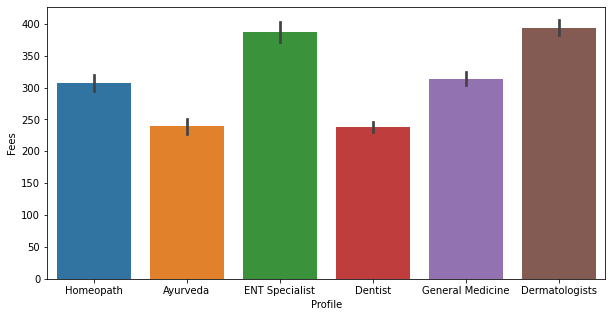

In [45]:
#Lets do some grpahical analysis
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.barplot(x="Profile",y="Fees",data=df_doc_final)
plt.show()
#Here it is clear that ENT specialist and Dermatologists charge more

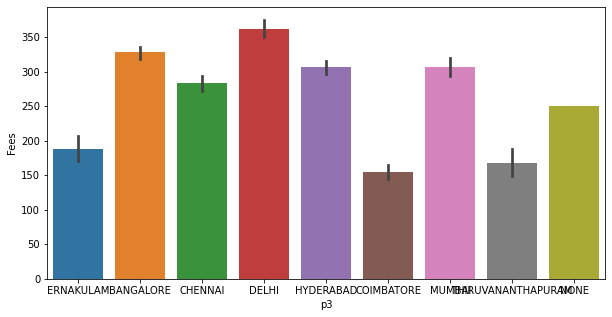

In [46]:
#lets check the averge rate of doctors in a city
plt.figure(figsize=(10,5))
sns.barplot(x="p3",y="Fees",data=df_doc_final)
plt.show()
#In delhi averge fees is maximum compared to other cities

In [47]:
df_doc_final.columns

Index([        'Experience',               'Fees', 'Miscellaneous_Info',
                  'Profile',             'Rating',             'source',
                       'p1',                 'p3',                 'q1',
                       'q2',
       ...
                        990,                  991,                  992,
                        993,                  994,                  995,
                        996,                  997,                  998,
                        999],
      dtype='object', length=1015)

In [48]:
from sklearn.preprocessing import LabelEncoder
for col in df_doc_final.columns:
    if df_doc_final[col].dtype=="object":
        df_doc_final[col]=LabelEncoder().fit_transform(df_doc_final[col])

In [49]:
df_doc_final

,Experience,Fees,Miscellaneous_Info,Profile,Rating,source,p1,p3,q1,q2,q3,q4,q5,q6,q7,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,24,100.0,968,5,100.0,1,321,4,8,302,406,225,104,31,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12,350.0,1300,0,98.0,1,926,0,5,292,406,225,104,31,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.844221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9,300.0,2362,3,0.0,1,492,0,102,396,406,225,104,31,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12,250.0,178,0,0.0,1,70,0,14,10,406,225,104,31,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20,250.0,993,0,100.0,1,364,1,5,411,406,225,104,31,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7943,10,NaN,2362,0,0.0,0,72,0,5,172,406,225,104,31,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7944,4,NaN,2362,2,0.0,0,133,1,111,493,316,225,104,31,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7945,9,NaN,2362,4,0.0,0,659,1,102,332,406,225,104,31,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7946,12,NaN,1965,1,98.0,0,33,0,6,411,406,225,104,31,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
#lets seprate test and train data
df_train=df_doc_final.loc[df_doc_final["source"]==1]
df_test=df_doc_final.loc[df_doc_final["source"]==0]

In [51]:
#Resetting the index
df_test.reset_index(drop=True,inplace=True)

In [52]:
#Dropping the source and unnammed column
df_train.drop(columns=["source"],inplace=True)
df_test.drop(columns=["source"],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [53]:
#Lets seprate the input and output from train dataset
df_x=df_train.drop(columns=["Fees"])
y=df_train[["Fees"]]

In [54]:
#Lets bring every column to common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [55]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [56]:
#to find random stat which gives least
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split
def maxr2_score(regr,df_x,y):
    min_rmsle_score=100
    for r_state in range(42,52):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        rmsle_scr=np.sqrt(mean_squared_log_error(y_test,y_pred))
        print("RMSLE corresponding to ",r_state," is ",rmsle_scr)
        if rmsle_scr<min_rmsle_score:
            min_rmsle_score=rmsle_scr
            final_r_state=r_state
    print("min RMSLE corresponding to ",final_r_state," is ",min_rmsle_score)
    return final_r_state

In [57]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
lg = lgb.LGBMRegressor(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 5, scoring="r2")
grid_search.fit(df_x,y)
grid_search.best_params_

{'learning_rate': 0.01,
 'max_depth': 25,
 'n_estimators': 200,
 'num_leaves': 300}

In [58]:
df_x.columns

Index([        'Experience', 'Miscellaneous_Info',            'Profile',
                   'Rating',                 'p1',                 'p3',
                       'q1',                 'q2',                 'q3',
                       'q4',
       ...
                        990,                  991,                  992,
                        993,                  994,                  995,
                        996,                  997,                  998,
                        999],
      dtype='object', length=1013)

In [59]:
#LGBM also give provision to define which all columns should be treated as categorical
#So we will use above provision and see what is the result
import warnings
warnings.filterwarnings("ignore")
params={'learning_rate': 0.01,'max_depth': 25,'n_estimators': 200,'num_leaves': 300}
cate_features_name=['Profile', 'Rating', 'p1', 'p3', 'q1', 'q2', 'q3','q4', 'q5', 'q6', "q7"]
max_r_score=0
for r_state in range(42,100):
    x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20)
    d_train = lgb.Dataset(x_train, label=y_train)
    lgb_model = lgb.train(params, d_train, categorical_feature = cate_features_name)
    y_pred = lgb_model.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2 score corresponding to ",r_state," is ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2 score corresponding to  42  is  0.2657025741374115
r2 score corresponding to  43  is  0.2230129567253435
r2 score corresponding to  44  is  0.2897285627017592
r2 score corresponding to  45  is  0.25996773827233743
r2 score corresponding to  46  is  0.2247780776152991
r2 score corresponding to  47  is  0.25185936506527073
r2 score corresponding to  48  is  0.2492321696893567
r2 score corresponding to  49  is  0.2721095803363621
r2 score corresponding to  50  is  0.24608631902030087
r2 score corresponding to  51  is  0.25430218963326223
r2 score corresponding to  52  is  0.20325539018184313
r2 score corresponding to  53  is  0.2406999241651281
r2 score corresponding to  54  is  0.27543173602973203
r2 score corresponding to  55  is  0.23649060386018683
r2 score corresponding to  56  is  0.22990209604570955
r2 score corresponding to  57  is  0.24909583784481426
r2 score corresponding to  58  is  0.19716856381984305
r2 score corresponding to  59  is  0.26047255198781105
r2 score correspo

In [60]:
# Lets make lgbm as our final model
x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = 90,test_size=0.20)
d_train = lgb.Dataset(x_train, label=y_train)
lgb_model = lgb.train(params, d_train, categorical_feature = cate_features_name)
y_pred = lgb_model.predict(x_test)

In [61]:
rmsle_scr=np.sqrt(mean_squared_log_error(y_test,y_pred))
print("RMSLE correspondingis ",rmsle_scr)
print("r2 score is ",r2_score(y_test,y_pred))

RMSLE correspondingis  0.5822420354756231
r2 score is  0.2952406517702525


In [62]:
#Applying model on the test set
doc_fee_pred=lgb_model.predict(df_test)

In [63]:
#storing predictions as dataFrame
doc_fee_pred=pd.DataFrame(doc_fee_pred,columns=["fees"])

In [64]:
#Storing results as csv
doc_fee_pred.to_csv("doctor_fees_predictions.csv",index=False)